## Recherche d'un motif

In [91]:
## Recherche naïve

def correspond(texte, k, motif):
    n = len(motif)
    for i in range(n):
        if texte[k+i] != motif[i]:
            return False
    return True

def recherche_algo_naif(texte, motif):
    n = len(motif)
    for k in range(len(texte)-n+1):
        if correspond(texte, k, motif):
            return k
    return -1

In [92]:
recherche_algo_naif("ABCDABCDEABCDEABCDEACDEFABCDEFABCDE", "ABCDEF")

24

In [112]:
## Algo de Boyer-Moore

def pretraitement(motif):
    dico = {}
    for k in range(len(motif)-1):
        dico[motif[k]] = len(motif) - 1 - k
    return dico

def correspond_renv(texte, k, motif):
    n = len(motif)
    for i in range(n-1, -1, -1):
        if texte[k-n+1+i] != motif[i]:
            return False
    return True

def boyer_moore_horspool(texte, motif):
    dico = pretraitement(motif)
    i = len(motif) - 1
    while i < len(texte):
        if correspond_renv(texte, i, motif):
            return i - len(motif) + 1
        if texte[i] in dico:
            i = i + dico[texte[i]]
        else:
            i = i + len(motif)
    return -1

In [113]:
boyer_moore_horspool("ABCDABCDEABCDEABCDEACDEFABCDEFABCDE", "ABCDEF")

24

In [114]:
from time import time

tps_debut = time()
print(recherche_algo_naif("ABCDEF"*1000000 + ".ABCDEFABCDEF", ".ABCDEFABCDEF"))
tps_fin = time()
print(tps_fin - tps_debut)

tps_debut = time()
print(boyer_moore_horspool("ABCDEF"*1000000 + ".ABCDEFABCDEF", ".ABCDEFABCDEF"))
tps_fin = time()
print(tps_fin - tps_debut)

6000000
4.990467548370361
6000000
5.555917263031006


In [119]:
motif = "Au poste de la place du Châtelet."
with open("les_miserables.txt", "r", encoding="utf-8") as fichier:
    texte = fichier.read()

tps_debut = time()
print(recherche_algo_naif(texte, motif))
tps_fin = time()
print(tps_fin - tps_debut)

2802443
2.3848018646240234


In [120]:
motif = "Au poste de la place du Châtelet."
with open("les_miserables.txt", "r", encoding="utf-8") as fichier:
    texte = fichier.read()

tps_debut = time()
print(boyer_moore_horspool(texte, motif))
tps_fin = time()
print(tps_fin - tps_debut)

2802443
0.22008538246154785


## Comptage des occurrences d'un motif

In [123]:
## Algo de Boyer-Moore

def pretraitement(motif):
    dico = {}
    for k in range(len(motif)-1):
        dico[motif[k]] = len(motif) - 1 - k
    return dico

def correspond_renv(texte, k, motif):
    n = len(motif)
    for i in range(n-1, -1, -1):
        if texte[k-n+1+i] != motif[i]:
            return False
    return True

def compte_boyer_moore_horspool(texte, motif):
    cpt = 0
    dico = pretraitement(motif)
    i = len(motif) - 1
    while i < len(texte):
        if correspond_renv(texte, i, motif):
            cpt = cpt + 1
        if texte[i] in dico:
            i = i + dico[texte[i]]
        else:
            i = i + len(motif)
    return cpt

In [132]:
motif = "Thénardier"
with open("les_miserables.txt", "r", encoding="utf-8") as fichier:
    texte = fichier.read()
print(compte_boyer_moore_horspool(texte, motif))

593


## Liste des indices des occurrences

In [137]:
## Algo de Boyer-Moore

def pretraitement(motif):
    dico = {}
    for k in range(len(motif)-1):
        dico[motif[k]] = len(motif) - 1 - k
    return dico

def correspond_renv(texte, k, motif):
    n = len(motif)
    for i in range(n-1, -1, -1):
        if texte[k-n+1+i] != motif[i]:
            return False
    return True

def liste_boyer_moore_horspool(texte, motif):
    L = []
    dico = pretraitement(motif)
    i = len(motif) - 1
    while i < len(texte):
        if correspond_renv(texte, i, motif):
            L.append(i - len(motif) + 1)
        if texte[i] in dico:
            i = i + dico[texte[i]]
        else:
            i = i + len(motif)
    return L

In [156]:
with open("les_miserables.txt", "r", encoding="utf-8") as fichier:
    texte = fichier.read()
listeV = liste_boyer_moore_horspool(texte, "Valjean")
listeC = liste_boyer_moore_horspool(texte, "Cosette")
listeM = liste_boyer_moore_horspool(texte, "Marius")

[]

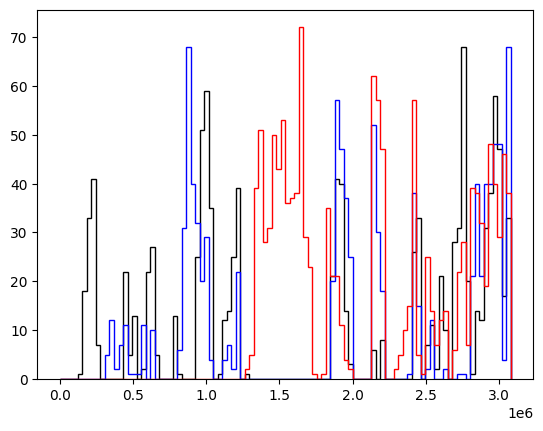

In [166]:
import matplotlib.pyplot as plt
plt.hist(listeV, histtype="step", bins=100, range=(0, len(texte)-1), color="k")
plt.hist(listeC, histtype="step", bins=100, range=(0, len(texte)-1), color="b")
plt.hist(listeM, histtype="step", bins=100, range=(0, len(texte)-1), color="r")
plt.plot()